In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [89]:
#数据格式化

datafile = open('Cr2O3-log.lammps', 'r', encoding='utf-8')
datas = datafile.readlines()
#print(type(datas))
datalist = []
for i in range(len(datas)-1):
    datas[i] = ' '.join(datas[i].split())
    datalist.append(datas[i])

#print(datalist)
    
datafile.close()



datafile = open('Cr2O3-log.txt', 'w')

data = '\n'.join(datalist)

datafile.write(data)

datafile.close()


In [74]:
contents = pd.read_csv('Cr2O3-log.txt', sep=' ')

star = int(input("起始行数："))

end = int(input("结束行数："))

contents = contents.iloc[star: end+1, :]

#contents = contents.drop(0)

contents.head()

起始行数：500
结束行数：600


,Step,Temp,PotEng,c_msd_all[4],c_msd_cr[4],c_msd_o[4],v_twopoint_all,v_twopoint_cr,v_twopoint_o,v_fitslope_all,v_fitslope_cr,v_fitslope_o
500,500000,302.60384,-29466.713,0.022157,0.021163,0.022775,0.000007,0.000007,0.000008,1.432103e-07,1.620189e-07,1.305489e-07
501,501000,309.70508,-29464.789,0.023601,0.023348,0.023730,0.000008,0.000008,0.000008,1.273393e-07,1.442589e-07,1.159740e-07
502,502000,310.10541,-29465.693,0.021943,0.021569,0.022160,0.000007,0.000007,0.000007,1.164445e-07,1.325851e-07,1.056379e-07
503,503000,301.40347,-29466.661,0.023892,0.023199,0.024351,0.000008,0.000008,0.000008,1.086412e-07,1.236830e-07,9.856413e-08
504,504000,307.30478,-29466.154,0.023031,0.022307,0.023496,0.000008,0.000007,0.000008,1.064237e-07,1.207271e-07,9.681575e-08


In [75]:
Step = contents['Step']/1000

Temp = contents['Temp']

PE = contents['PotEng']

msd_Cr2O3 = contents['c_msd_all[4]']

msd_Cr = contents['c_msd_cr[4]']

msd_O = contents['c_msd_o[4]']

v_twopoint_Cr2O3 = contents['v_twopoint_all']

v_twopoint_Cr = contents['v_twopoint_cr']

v_twopoint_O = contents['v_twopoint_o']

v_fitslope_Cr2O3 = contents['v_fitslope_all']

v_fitslope_Cr = contents['v_fitslope_cr']

v_fitslope_O = contents['v_fitslope_o']

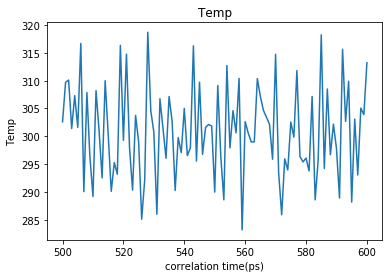

In [84]:
# Temp
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("Temp")
plt.plot(Step, Temp)
plt.title('Temp')

plt.show()

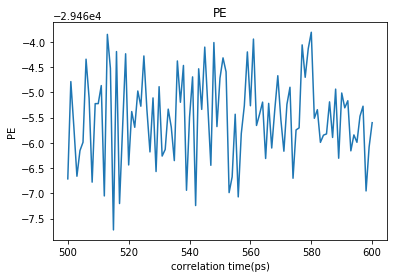

In [85]:
# Temp
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("PE")
plt.plot(Step, PE)
plt.title('PE')

plt.show()

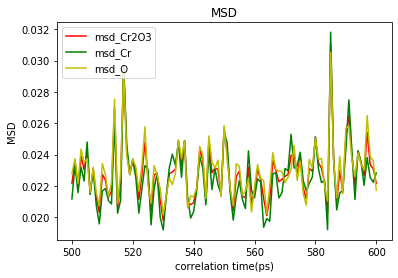

In [86]:
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("MSD")
plt.plot(Step, msd_Cr2O3, color='r', label='msd_Cr2O3')
plt.plot(Step, msd_Cr, color='g', label='msd_Cr')
plt.plot(Step, msd_O, color='y', label='msd_O')
plt.legend(loc="upper left")
plt.title('MSD')

plt.show()

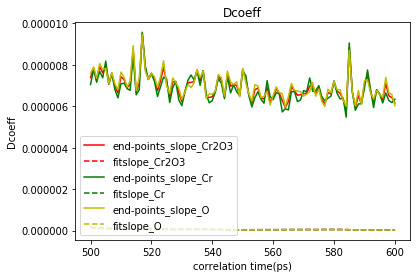

In [87]:
plt.figure()

plt.xlabel("correlation time(ps)")
plt.ylabel("Dcoeff")
plt.plot(Step, v_twopoint_Cr2O3, color="r", linestyle='-', label='end-points_slope_Cr2O3')
plt.plot(Step, v_fitslope_Cr2O3, color="r", linestyle='--', label='fitslope_Cr2O3')
plt.plot(Step, v_twopoint_Cr, color="g", linestyle='-', label='end-points_slope_Cr')
plt.plot(Step, v_fitslope_Cr, color="g", linestyle='--', label='fitslope_Cr')
plt.plot(Step, v_twopoint_O, color="y", linestyle='-', label='end-points_slope_O')
plt.plot(Step, v_fitslope_O, color="y", linestyle='--', label='fitslope_O')
plt.legend(loc="lower left")
plt.title('Dcoeff')

plt.show()